# Project description

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

# Part 1. Prioritizing Hypotheses

- The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

##### Importing libraries

In [77]:
import pandas
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from math import factorial
from scipy import stats as st
from functools import reduce
import math
import random
import datetime as dt

### Reading, optimizing, and examining Hypotheses dataframe

In [78]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


- There are 9 hypothesis in our data. No missing values

In [79]:
hypotheses.columns = hypotheses.columns.str.lower()

In [80]:
hypotheses['hypothesis']

0    Add two new channels for attracting traffic. T...
1    Launch your own delivery service. This will sh...
2    Add product recommendation blocks to the store...
3    Change the category structure. This will incre...
4    Change the background color on the main page. ...
5    Add a customer review page. This will increase...
6    Show banners with current offers and sales on ...
7    Add a subscription form to all the main pages....
8    Launch a promotion that gives users discounts ...
Name: hypothesis, dtype: object

In [81]:
hypotheses['reach'].sort_values(ascending = False)

7    10
3     8
2     8
6     5
5     3
4     3
0     3
1     2
8     1
Name: reach, dtype: int64

- Hypothesis 7 has the most reach value with a 10 while hypothesis 3 and 2 have 8 

In [82]:
hypotheses['impact'].sort_values(ascending = False)

0    10
8     9
7     7
1     5
6     3
3     3
2     3
5     2
4     1
Name: impact, dtype: int64

- Hypothesis 0 has the most impact and then 8 with 9

In [83]:
hypotheses['confidence'].sort_values(ascending = False)

8    9
7    8
6    8
0    8
2    7
1    4
3    3
5    2
4    1
Name: confidence, dtype: int64

- Hypothesis 8 has the most confidence score at 9. 7, 6, and 0 are next all with a score of 8

In [84]:
hypotheses['effort'].sort_values(ascending = False)

1    10
3     8
0     6
8     5
7     5
6     3
5     3
2     3
4     1
Name: effort, dtype: int64

- Hypothesis 1 will require the most effort to accomplish by launching our own delivery service with hypothesis 3 coming in with a score of 8 while all the rest of the hypothesis would require 6 or less of an effort to accomplish

#### Applying the ICE framework to prioritize hypotheses.

In [85]:
#making new ICE column
hypotheses['ICE']= (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

In [86]:
print(hypotheses.loc[:,['hypothesis', 'ICE']].sort_values(by= 'ICE', ascending= False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


- Hypothesis 8 is highest priority with the ICE framework at 16.20 while 0 and 7 have 13.33 and 11.20 respectively.
- The rest of the hypothesis fall under a score of 10

#### Applying the RICE framework to prioritize hypotheses. 

In [87]:
#making new RICE column
hypotheses['RICE']= (hypotheses['reach'] * hypotheses['impact']) * hypotheses['confidence'] / hypotheses['effort']

In [88]:
print(hypotheses.loc[:,['hypothesis', 'RICE']].sort_values(by= 'RICE', ascending= False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


- Hypothesis 7 is highest priority with the RICE framework at 112 while 2 gets a score of 56. The rest fall under a score of 50

#### Showing how the prioritization of hypotheses changes when you use RICE instead of ICE. 

In [89]:
hypotheses.sort_values(by = 'ICE', ascending = False).head()

,hypothesis,reach,impact,confidence,effort,ICE,RICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0


In [90]:
hypotheses.sort_values(by = 'RICE', ascending = False).head()

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


In [91]:
hypotheses['hypothesisint'] = [0, 1, 2, 3, 4, 5, 6, 7, 8,]

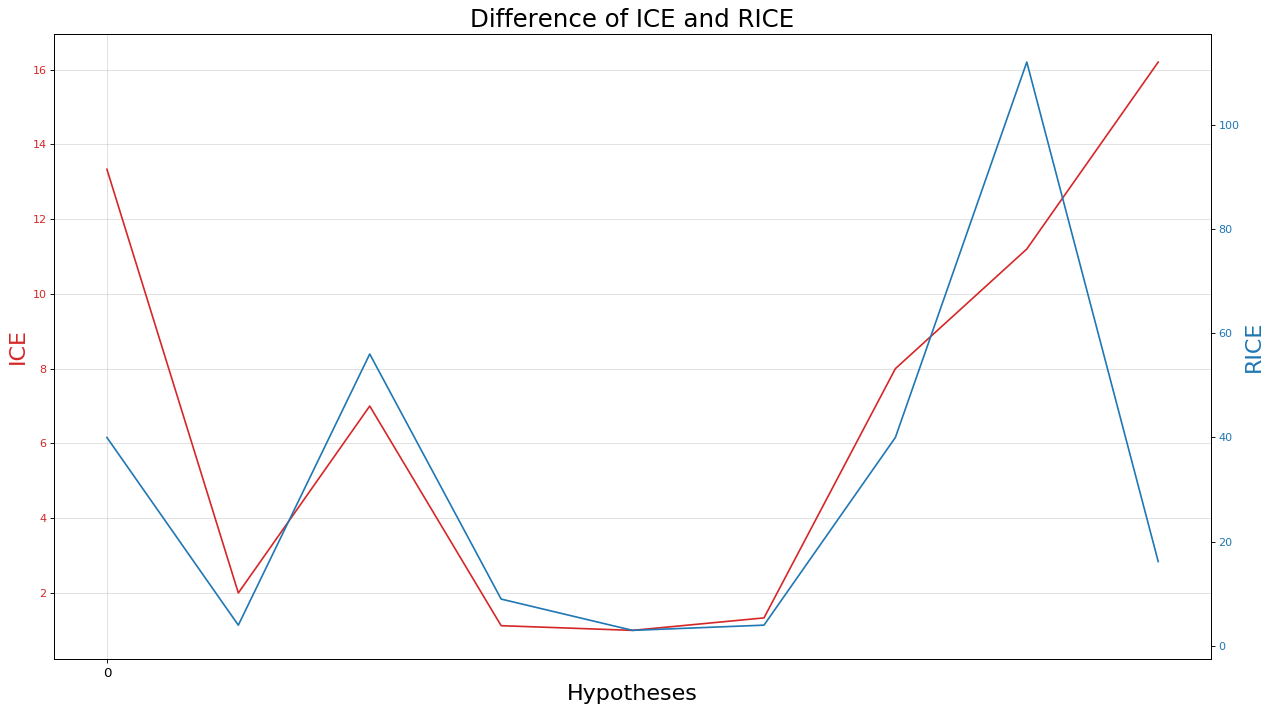

In [92]:
x = hypotheses['hypothesisint']
y1 = hypotheses['ICE']
y2 = hypotheses['RICE']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Hypotheses', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('ICE', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("RICE", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Difference of ICE and RICE", fontsize=22)
fig.tight_layout()
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Nice plot! I like color scheme and double Y-axis. Probably barplot or scatter plot will be more useful, because lines show false trend.
</div>

- The top five prioritized hypotheses with ICE are 8, 0, 7, 6, and 2 in order from highest to lowest priority.
- The top five prioritized hypotheses with RICE are 7, 2, 0, 6, 8 in order from highest to lowest priority.
- The highest priority goes to hypothesis 8 when using ICE as a method of prioritization
- The highest priority goes to hypothesis 7 when using the RICE method of prioritization
- The reason for this change is because with RICE we added the amount of significance of reach to users and new audience would be. 
- Even though with ICE hypothesis 8 would have medium amount of effort and would work very well for users that are already in the system it would not reach any new audience because it would only be targeting our users that we have already. Therefore it ends up having the lowest priority with RICE.
- With RICE we are showing how much reach to users and new audience we will also have so adding a subscription for for all our main pages will reach new prospective users as well and adding product recommendation blocks to our store will be seen by anyone.
- Hypothesis 0 will have the most impact on our profit because it can help attract new customers but it isn't meant for our users so again it will have little reach. It has the most effort though.
- Reach is a very important aspect for RICE and that is why hypothesis 8 which has the most reach of all and a high impact and confidence jumps from the 5th lowest priority in ICE to highest priority in RICE

# Part 2. A/B Test Analysis

-You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.

### Reading, optimizing, and examining Orders dataframe

In [93]:
#orders = pd.read_csv('B:\Yandex\projects\Project7\orders_us.csv')
orders= pd.read_csv('/datasets/orders_us.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [94]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [95]:
orders.duplicated().sum()

0

- There are 1197 rows. No missing values
- Group A and B then have 1197 visitors between them
- We will have to check if there are any visitors that somehow made it into both groups

In [96]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [97]:
orders.columns = orders.columns.str.lower()

In [98]:
orders.sample(5)

,transactionid,visitorid,date,revenue,group
844,3734714128,471551937,2019-08-05,355.1,A
711,672040400,723038324,2019-08-20,50.9,B
335,4006427057,612505725,2019-08-25,20.2,A
642,369801982,954785863,2019-08-04,155.8,B
450,1750160666,1333886533,2019-08-06,25.5,A


In [99]:
orders['transactionid'].value_counts()

3574407166    1
2470658885    1
1476831880    1
3709669952    1
2764584088    1
             ..
1168756094    1
1185885568    1
11068804      1
486237576     1
1192185169    1
Name: transactionid, Length: 1197, dtype: int64

In [100]:
multiples = orders['visitorid'].value_counts().reset_index()

- A few users made multiple transactions. Let's see if any of them are in both groups
- So there were 1197 transactions made by 1031 users

In [101]:
multiples.columns = ['id', 'amount']

In [102]:
multiple_visits = multiples.query('amount > 2')

In [103]:
multiple_visits

,id,amount
0,4256040402,11
1,2458001652,11
2,2378935119,9
3,2038680547,8
4,3717692402,5
5,3062433592,5
6,199603092,5
7,1230306981,5
8,3803269165,5
9,237748145,5


- 30 users made multiple visits

In [104]:
visitor4256040402 = orders.query('visitorid == "4256040402"')

In [105]:
visitor4256040402

,transactionid,visitorid,date,revenue,group
60,1421016313,4256040402,2019-08-16,875.5,B
114,1120327437,4256040402,2019-08-01,90.2,A
187,2048878902,4256040402,2019-08-17,25.8,A
253,1610091760,4256040402,2019-08-23,265.8,A
263,2575861846,4256040402,2019-08-18,170.8,B
588,3700356838,4256040402,2019-08-20,275.5,A
873,2519737434,4256040402,2019-08-08,900.7,B
901,3402467119,4256040402,2019-08-27,30.1,A
1018,1415970216,4256040402,2019-08-31,80.5,A
1019,453824282,4256040402,2019-08-31,30.5,B


- We can see that this user is in both groups.

In [106]:
users_grouped = orders.groupby('visitorid').agg({'group': 'nunique'})
users_grouped['group'].value_counts()

1    973
2     58
Name: group, dtype: int64

- And it looks like we have 58 instances where a user ended up in both group A and B

In [107]:
users_one_group= users_grouped.query('group == 1')

- We made a new dataset with users that only were in 1 group

In [108]:
orders = orders[orders['visitorid'].isin(users_one_group.index)]

- Made sure that this new dataset becomes part of our orders dataset

In [109]:
visitors = orders.groupby('group').agg({'visitorid': 'nunique'})
visitors

,visitorid
group,
A,445
B,528


- But now A and B need to have same numbers in order for us to compare them

- Updated observation. Group B has more visitorids in its group. We can change it that they will be equal in number but since the test is already ongoing and these are the numbers we have we should check based on what we have instead of possibly altering the results

In [110]:
#B_group = pd.Series(orders[orders['group'] == 'B']['visitorid'].unique()).sample(445)

#orders_B = orders.query('visitorid in @B_group & group == "B"')

#orders_A = orders[orders['group'] == 'A']

#len(orders_A['visitorid'].unique()) == len(orders_B['visitorid'].unique())

In [111]:
orders_B = orders[orders['group'] == 'B']
orders_A = orders[orders['group'] == 'A']

- Separated the groups and did not change Group B's size

In [112]:
visitor4256040402fixedA = orders_A.query('visitorid == "4256040402"')
visitor4256040402fixedA

,transactionid,visitorid,date,revenue,group


In [113]:
visitor4256040402fixedB = orders_B.query('visitorid == "4256040402"')
visitor4256040402fixedB

,transactionid,visitorid,date,revenue,group


- We were able to get rid of this user and the others that were mixed in with both groups

In [114]:
orders_A['revenue'].describe()

count     468.000000
mean      113.700855
std       171.372117
min         5.000000
25%        20.300000
50%        50.100000
75%       131.925000
max      1425.800000
Name: revenue, dtype: float64

In [115]:
orders_B['revenue'].describe()

count      548.000000
mean       145.348905
std        868.228227
min          5.100000
25%         20.800000
50%         45.900000
75%        125.200000
max      19920.400000
Name: revenue, dtype: float64

- Max for Group A is 1425.80 and for Group B is 19920.40. That is a huge difference of revenue
- There are definitely some outliers and abnormalities here in the data that can skew the results

In [116]:
orders_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 7 to 1194
Data columns (total 5 columns):
transactionid    468 non-null int64
visitorid        468 non-null int64
date             468 non-null datetime64[ns]
revenue          468 non-null float64
group            468 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 21.9+ KB


In [117]:
orders_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    548 non-null int64
visitorid        548 non-null int64
date             548 non-null datetime64[ns]
revenue          548 non-null float64
group            548 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 25.7+ KB


 - We started with 1197 rows but now are down to 468 for Group A and 548 for Group B
- We also have noticed a few outliers like Group B having revenue of 19920.40

In [118]:
orders_fix = orders_A.append(orders_B)

In [119]:
orders_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 7 to 1196
Data columns (total 5 columns):
transactionid    1016 non-null int64
visitorid        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null float64
group            1016 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [120]:
orders_fix.sample(5)

,transactionid,visitorid,date,revenue,group
986,218256919,91069833,2019-08-10,15.6,B
545,2172704731,2042457747,2019-08-29,280.8,B
756,125335873,3423937755,2019-08-30,5.8,B
365,4288552432,2971471657,2019-08-19,10.8,A
1138,2974379446,3160565905,2019-08-13,25.2,A


- Brought the A and B groups back together in order for us to continue testing and have 1016 rows
- We have a few outliers

### Reading, optimizing, and examining Visits dataframe

In [121]:
#visits = pd.read_csv('visits_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


- We have 62 rows here. That is 62 dates. So 31 for each group

In [122]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [123]:
visits.sample(5)

,date,group,visits
41,2019-08-11,B,721
45,2019-08-15,B,544
38,2019-08-08,B,654
7,2019-08-08,A,610
42,2019-08-12,B,543


In [124]:
visits['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

- The testing took place in the month of August. August 1, 2019 until August 31, 2019

In [125]:
visits['visits'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visits, dtype: float64

- Maximum visits were 770 in one day. Most of the visits were over 600 visitors in a day

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1bc015b50>]],
      dtype=object)

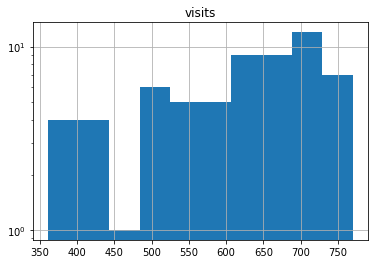

In [126]:
visits.hist(log= True)

### Splitting Groups

In [127]:
ordersByUsersA = orders_fix[orders_fix['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

In [128]:
ordersByUsersA.head()

,visitorid,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [129]:
ordersByUsersB = orders_fix[orders_fix['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders'] 

In [130]:
ordersByUsersB.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [131]:
# building an array with unique paired date-group values
datesGroups = orders_fix[['date','group']].drop_duplicates()

In [132]:
datesGroups

,date,group
7,2019-08-15,A
45,2019-08-16,A
55,2019-08-01,A
86,2019-08-22,A
124,2019-08-17,A
...,...,...
930,2019-08-31,B
1043,2019-08-11,B
1067,2019-08-12,B
1114,2019-08-13,B


In [133]:
# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders_fix[np.logical_and(orders_fix['date'] <= x['date'], orders_fix['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [134]:
# getting aggregated cumulative daily data on visitors  
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [135]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

print(cumulativeData.head()) 

        date group  orders  buyers  revenue  visits
0 2019-08-01     A      23      19   2266.6     719
1 2019-08-01     B      17      17    967.2     713
2 2019-08-02     A      42      36   3734.9    1338
3 2019-08-02     B      40      39   3535.3    1294
4 2019-08-03     A      66      60   5550.1    1845


#### Graph cumulative revenue by group. Make conclusions and conjectures.

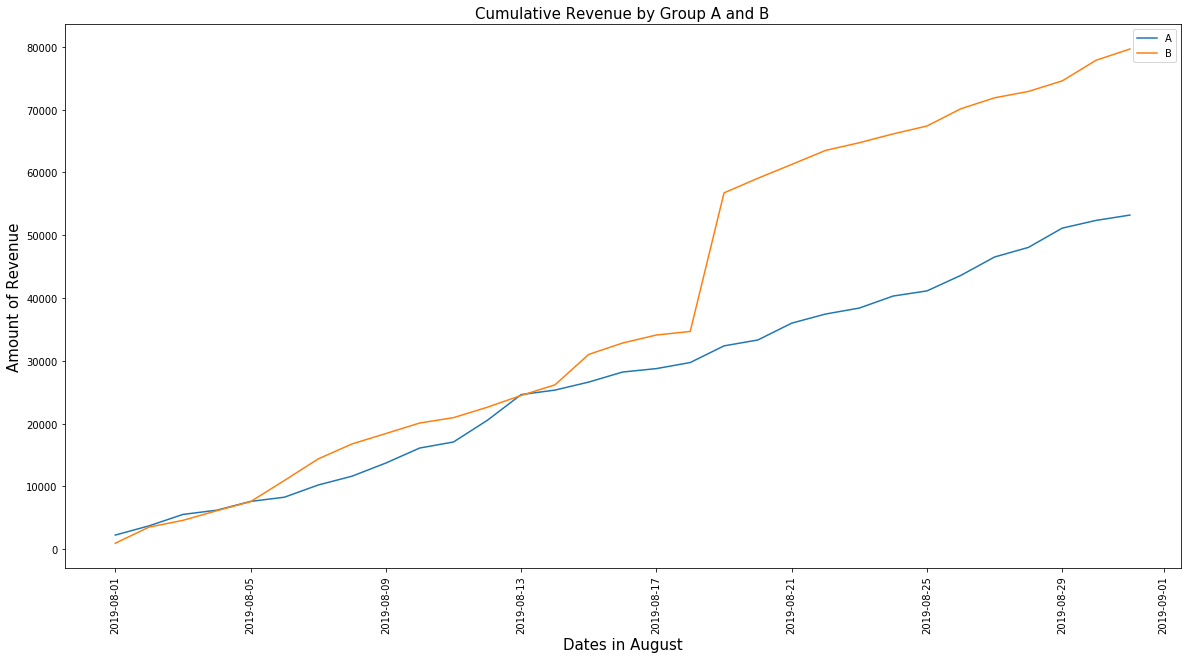

In [136]:
#DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


#Increasing size of graph and rotating axis
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Cumulative Revenue by Group A and B', fontdict={'size':15})
plt.ylabel('Amount of Revenue', fontdict={'size': 15})
plt.xlabel('Dates in August', fontdict={'size': 15})

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.legend() 

- We can see here that both Group A and B are rising steadily in revenue. Group A had a little more revenue by August 13 than Group B but then after August 17 Group B shot away from Group A and had  a steady stream of revenue over 50000 the rest of the month
- Group B is definitely the leader in the second half of the month.
- Of course we know Group B had more orders than Group A at some point

#### Graph cumulative average order size by group. Make conclusions and conjectures

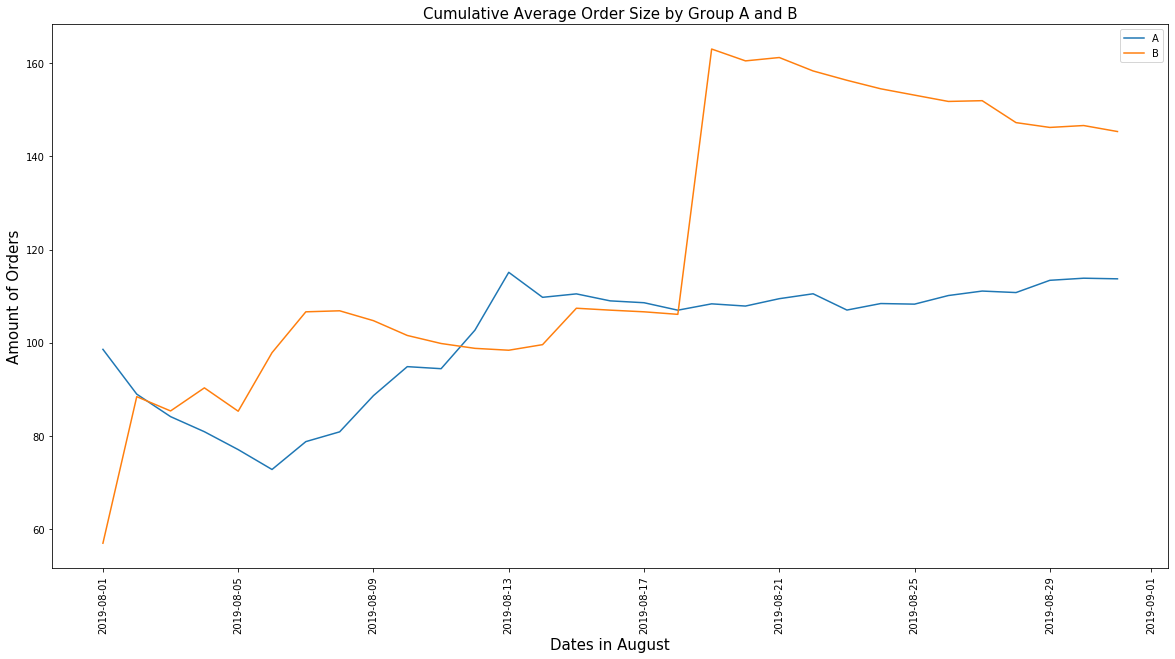

In [137]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Cumulative Average Order Size by Group A and B', fontdict={'size':15})
plt.ylabel('Amount of Orders', fontdict={'size': 15})
plt.xlabel('Dates in August', fontdict={'size': 15})
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

- Well we can see here that Group A started with more orders than Group B but then dropped with a low point after August 5th. Though it rose up and stayed steady with orders after August 13.
- Group B started slow but then around the time where the revenue shot up the orders did as well and they started to gradually lower after its high point right after August 17
- That must be why the revenue was higher the second half of the month for Group B

#### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

<Figure size 1440x720 with 0 Axes>

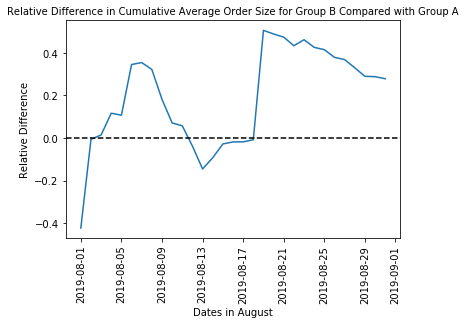

<Figure size 1440x720 with 0 Axes>

In [138]:
#gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.title('Relative Difference in Cumulative Average Order Size for Group B Compared with Group A', fontdict={'size':10})
plt.ylabel('Relative Difference', fontdict={'size': 10})
plt.xlabel('Dates in August', fontdict={'size': 10})
plt.xticks(rotation=90)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.figure(figsize=(20,10))


- As we can see Group B started out lower but then rose up and theres a major fluctuation between August 5 and then it settles by August 9 where we did see that Group A and B started having similar numbers of orders until after August 17 where Group B has a significant difference because of a large order.
- Group B starts coming back after that huge leap though

#### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [139]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

['2019-08-01', '2019-08-31', 0.024, 0.036]

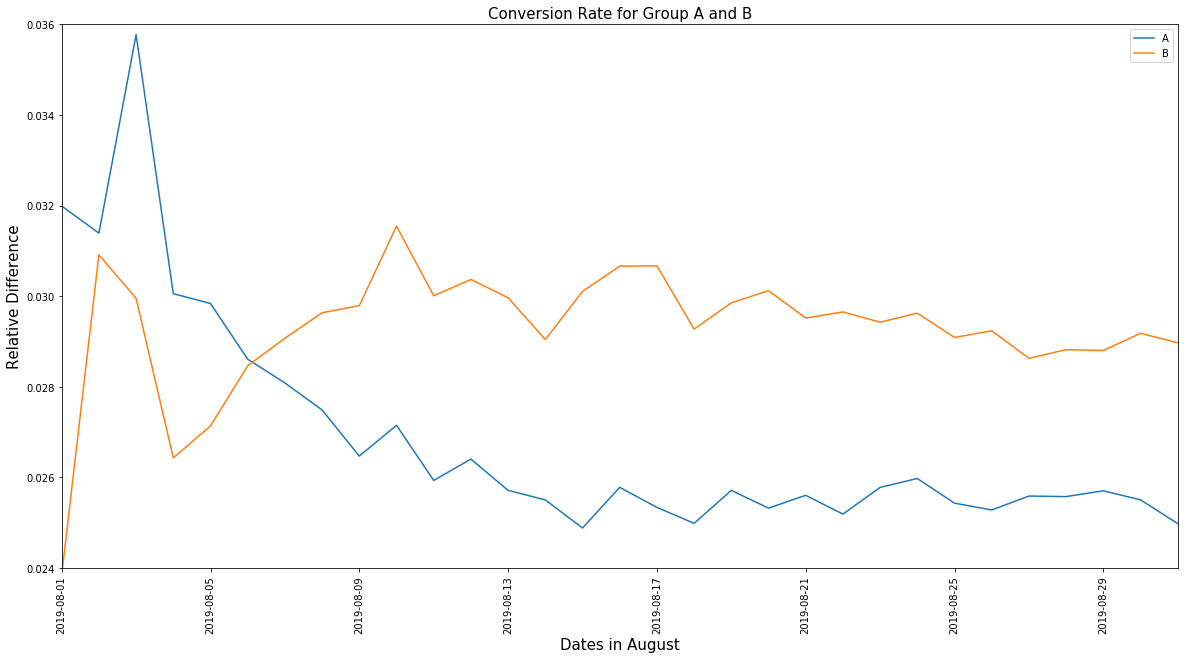

In [144]:
# plotting the graphs
plt.figure(figsize=(20,10))
plt.title('Conversion Rate for Group A and B', fontdict={'size':15})
plt.ylabel('Relative Difference', fontdict={'size': 15})
plt.xlabel('Dates in August', fontdict={'size': 15})
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=90)
plt.legend()

# setting the axes' scale
plt.axis(["2019-08-01", '2019-08-31', 0.024, 0.036]) 

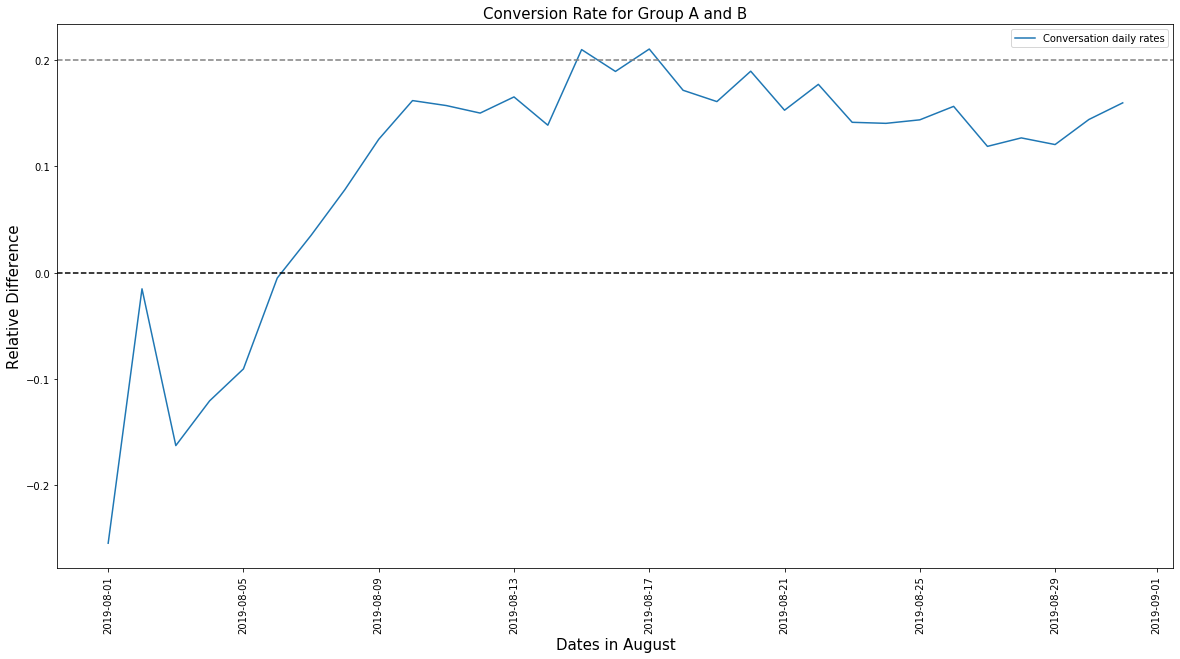

In [145]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(20,10))
plt.title('Conversion Rate for Group A and B', fontdict={'size':15})
plt.ylabel('Relative Difference', fontdict={'size': 15})
plt.xlabel('Dates in August', fontdict={'size': 15})
plt.xticks(rotation=90)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Conversation daily rates")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

- We still see Group B starting slow but here we see that the conversion ratio is pretty stable between the groups. So it must be that the outliers are causing the fluctuations in the testing
- Group B shows a better conversion rate than Group A.
- Group A started out strong but then faltered whereas Group B started at slowly but then gained more than Group A and they both stayed steady in their place and both seem to be gradually lowering

#### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [146]:
ordersByUsers = orders_fix.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})

ordersByUsers.columns = ['visitorid','orders']

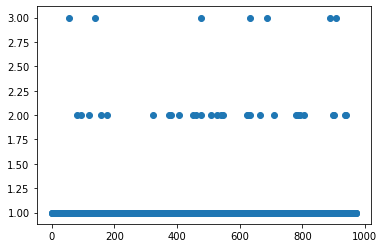

In [147]:
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']) 

- As we had seen before there were a few outliers. Here we can see that most users had 1 order and there were a few that had 2 orders. 

#### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [148]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


- Not more than 5% of users placed more than 1 , and not more than 1% of users made more than two orders.
- I will define the abnormal point of being any orders above 2 or the 99th percentile

#### Plot a scatter chart of order prices. Make conclusions and conjectures.

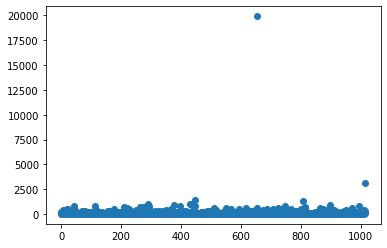

In [149]:
x_values = pd.Series(range(0, len(orders_fix['revenue'])))
plt.scatter(x_values, orders_fix['revenue']) 

- Well we can see that we have two outliers one above 2500 and one above 20000. 

#### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [150]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[280.8   414.275 830.3  ]


- Not more than 5% of orders was more than 414.275, and not more than 1% was more than 830.3.

- Well I think here we can say that anything above 830 is abnormal

#### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

- Our H0 is that Group A and Group B are statistically equal in their conversion using the raw data.
- Our H1 is that Group A and Group B are statistically different in their conversion using the raw data
- I will choose to use the significance level of Alpha at 0.05 which is what we have been using in our projects and which the common significance level to use. 

In [151]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.006
0.160


- The first row of the output gives us the p-value, 0.006, which is less than 0.05 which is our Alpha. So we will need to reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. And the relative gain of Group B is 16%.
- Well it seems from here that Group B is doing fairly better than Group A 

#### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

- Our H0 is that Group A and Group B are statistically equal in their average order size using the raw data.
- Our H1 is that Group A and Group B are statistically different in their average order size using the raw data
- I will choose to use the significance level of Alpha at 0.05 which is what we have been using in our projects and which the common significance level to use.

In [152]:
print("{0:.5f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.5f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.43112
0.27834


- The p-value is considerably higher than 0.05 or 5%, which is our Alpha, at 43%, so there's no reason to reject the null hypothesis.
- Therefore we can conclude that average order size is statistically equal between the groups. 
- The average order size for Group B is 28% larger than it is for Group A.

#### Filtering Data

In [153]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders_fix[orders_fix['revenue'] > 830]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorid, dtype: int64
(19,)


- Well we have 19 anomolous users that have contributed to the fluctuations

#### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

- Our H0 is that Group A and Group B are statistically equal in their conversion using the filtered data.
- Our H1 is that Group A and Group B are statistically different in their conversion using the filtered data
- I will choose to use the significance level of Alpha at 0.05 which is what we have been using in our projects and which the common significance level to use.

In [154]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [155]:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.003
0.192


- Well with the filtered data the p-value changed from 0.006 to 0.003 which means we still can't reject the null hypothesis and we see that there is a positive conversion of Group B of 19% which is more than the earlier conversion rate by 3%
- Group B is still doing pretty well in our test

#### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

- Our H0 is that Group A and Group B are statistically equal in their average order size using the filtered data.
- Our H1 is that Group A and Group B are statistically different in their average order size using the filtered data
- I will choose to use the significance level of Alpha at 0.05 which is what we have been using in our projects and which the common significance level to use.

In [156]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.438
-0.014


- Where the data had 0.431 beforehand and we couldn't reject the null hypothesis here it to 0.438 which will lead us to the same conclusions as beforehand and we will not reject the null hypothesis.
- Here though it shows that Group B has a loss of 1% which probably shows that Group B had a lot of the orders that were problematic in our tests and once we filtered them out the average order size for each Group was much closer than with the raw data

#### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

- The raw and filtered data revealed that there is a statistically significant difference in conversion between the groups.

- The raw and filtered data revealed that there is not a statistically significant difference in average order size between the groups.

- The graph showing the difference in conversion between the groups tells us that Group B's results are much better than Group A's

- The graph showing the difference in average order size between the groups tells us that group B's results were dramatically higher after August 17 but were on par for some of the time with Group A's results but towards the end of the month it was gradually lowering towards Group A.

- According to our graphs and the conclusions we have made we can say that we can stop the test and say that Group B has done better than Group A and that its conversion rate was better than Group A's though it seems to be dropping towards the end.